In [28]:
"""
<Python 문서 전체 설명>
1. 전체 순서
    1. 필요 라이브러리, 데이터 불러오기
    2. EDA 및 데이터 시각화
    3. 이상치 처리
    4. 데이터 인코딩
    5. 데이터 분할
    6. 데이터 스케일링
    7. 모델 학습 및 평가
        7-1. 선형회귀
        7-2. 랜덤 포레스트
        7-3. XGBoost
        7-4. LightGBM
    8. 결과 비교
    9. 결과 해석
    10. 모델 저장 및 로딩
2. #: 코드 설명, ##: 대제목, ###: 소제목
    ##과 ###은 마크다운 셀에서 실행, 일반 셀과 구분하기 위해 ***으로 감싸줌
3. 수정하기 쉽도록 문단 간의 띄어쓰기는 최종 파이썬 파일을 정리할 때 할 예정
    파이썬 파일은 코드를 전체적으로 볼 때만 사용
"""

'\n<Python 문서 전체 설명>\n1. 전체 순서: 1. 데이터 읽기 / 2. 데이터셋 준비하기 / 3. 데이터셋 분할하기\n2. #: 코드 설명, ##: 대제목, ###: 소제목\n    ##과 ###은 마크다운 셀에서 실행, 일반 셀과 구분하기 위해 ***으로 감싸줌\n3. 수정하기 쉽도록 문단 간의 띄어쓰기는 최종 파이썬 파일을 정리할 때 할 예정\n    파이썬 파일은 코드를 전체적으로 볼 때만 사용\n'

## ***1. 필요 라이브러리 및 데이터 불러오기***

In [11]:
# warning 제거
import warnings
warnings.filterwarnings('ignore')
# 필요 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [12]:
# 데이터 파일 확인
input_path = os.getcwd() + '/used_car copy'  # 데이터셋이 저장된 경로
file_paths = []

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)

print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")
print(file_paths)

총 9개의 CSV 파일을 발견했습니다.
['c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\audi.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\bmw.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\ford.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\hyundai.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\merc.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\skoda.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\toyota.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vauxhall.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vw.csv']


In [13]:
# CSV 파일 읽기 및 병합
data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0]
    data_frames.append(df)    

c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\audi.csv 파일 읽기 완료. 데이터 크기: (10668, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\bmw.csv 파일 읽기 완료. 데이터 크기: (10781, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\ford.csv 파일 읽기 완료. 데이터 크기: (17965, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\hyundai.csv 파일 읽기 완료. 데이터 크기: (4860, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\merc.csv 파일 읽기 완료. 데이터 크기: (13119, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\skoda.csv 파일 읽기 완료. 데이터 크기: (6267, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\toyota.csv 파일 읽기 완료. 데이터 크기: (6738, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vauxhall.csv 파일 읽기 완료. 데이터 크기: (13632, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vw.csv 파일 읽기 완료. 데이터 크기: (15157, 9)


In [14]:
# 모든 데이터프레임을 하나로 병합
if data_frames:
    full_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full_data.shape}")
else:
    print("CSV 파일이 없습니다.")    

병합된 데이터 크기: (99187, 11)


In [15]:
# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full_data.head())

데이터의 첫 5행 미리보기:
  model  year  price transmission  mileage fuelType    tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150.0  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20.0  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30.0  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145.0  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145.0  49.6         1.0   

              carMake  tax(£)  
0  used_car copy\audi     NaN  
1  used_car copy\audi     NaN  
2  used_car copy\audi     NaN  
3  used_car copy\audi     NaN  
4  used_car copy\audi     NaN  


In [16]:
# full_data 내보내기
# full_data.to_csv('full_data.csv', index=False) # 파일 실행마다 파일 생성을 방지하기 위해 주석 처리

## ***2. EDA 및 데이터 시각화***

### ***EDA를 위한 값 수정 및 채우기***

In [29]:
# 전처리를 위한 복사본 만들기
full_data2 = full_data.copy(deep=True)

# 명목형 변수 값의 공백을 삭제
str_list = ['model', 'transmission', 'fuelType', 'carMake'] # 명목변수
for i in str_list:
    full_data2[i] = full_data2[i].str.strip()
print(full_data2['model'].unique()[:20])

['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5']


In [18]:
# tax열 결측치 채우기: tax 와 tax(£) 컬럼 합치기
full_data2['tax'].fillna(full_data2['tax(£)'], inplace=True)
full_data2.drop(columns='tax(£)', inplace=True)
full_data2.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
carMake         0
dtype: int64

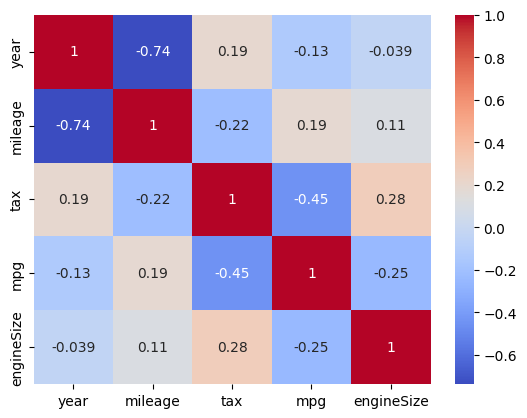

In [ ]:
# 다중공선성(독립변수 간의 상관관계) 확인
full_data_numeric = full_data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
sns.heatmap(data=full_data_numeric.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## ***3. 이상치 처리***

model name: A3, count:1929
2000년 이전 year 수:1


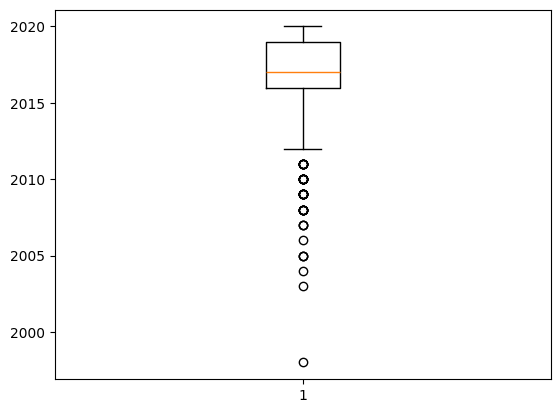

model name: A8, count:118
2000년 이전 year 수:1


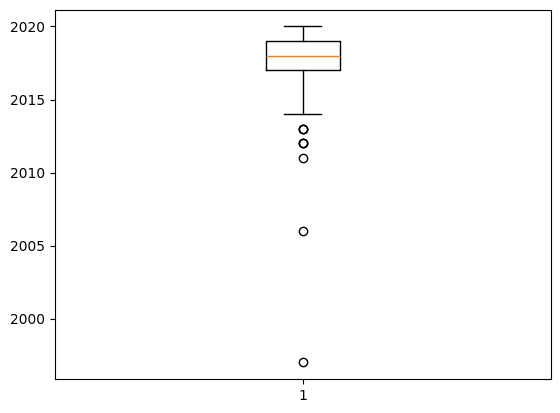

model name: 5 Series, count:1056
2000년 이전 year 수:1


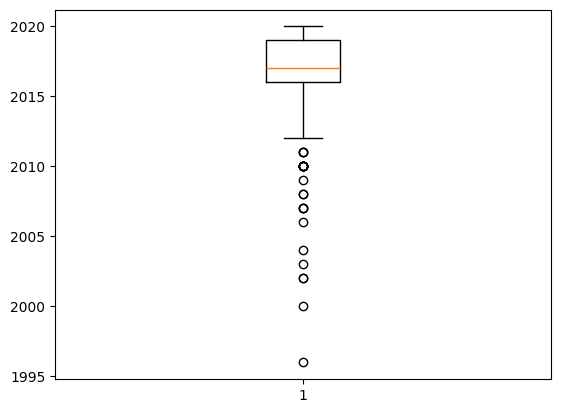

model name: 3 Series, count:2443
2000년 이전 year 수:1


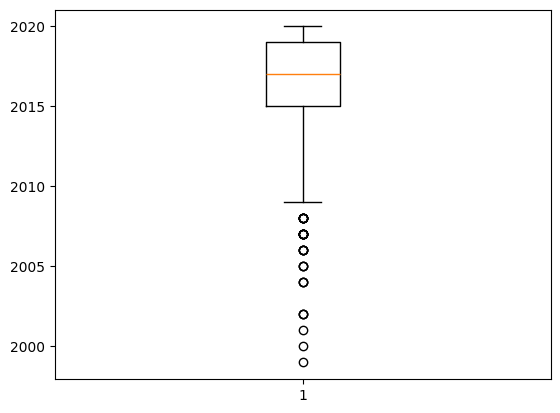

model name: Z3, count:7
2000년 이전 year 수:5


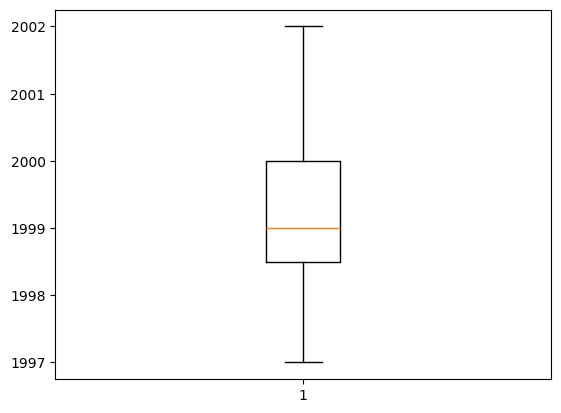

model name: Fiesta, count:6557
2000년 이전 year 수:1


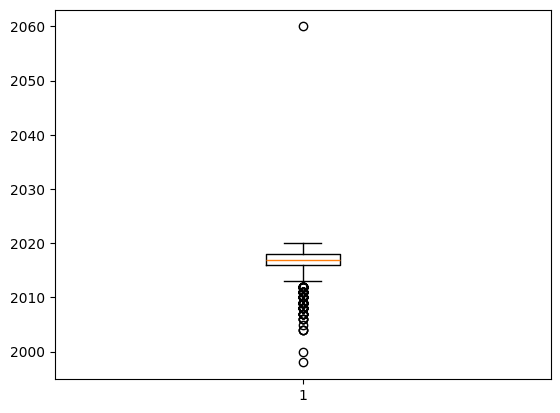

model name: Escort, count:1
2000년 이전 year 수:1


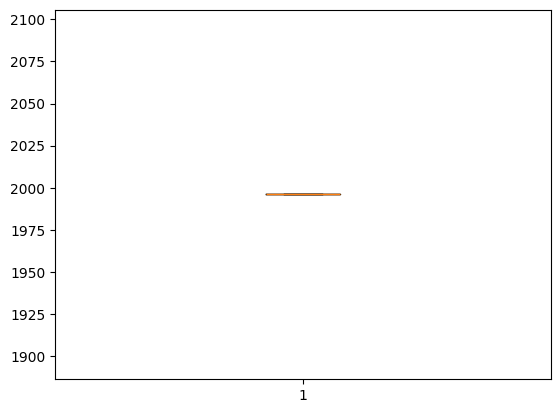

model name: SLK, count:95
2000년 이전 year 수:2


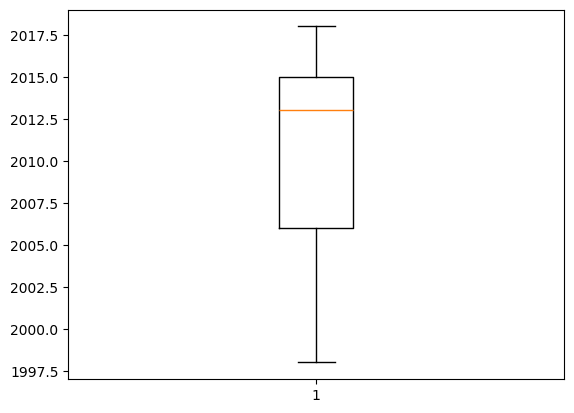

model name: S Class, count:197
2000년 이전 year 수:2


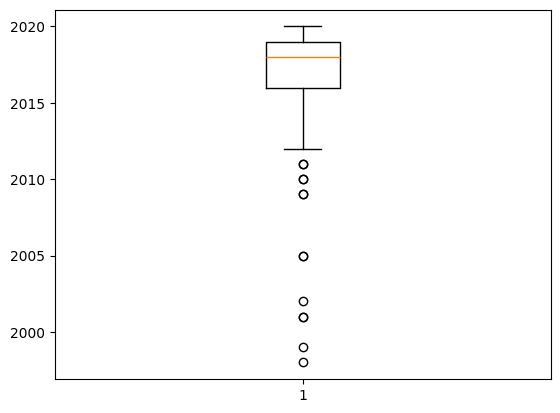

model name: SL CLASS, count:260
2000년 이전 year 수:2


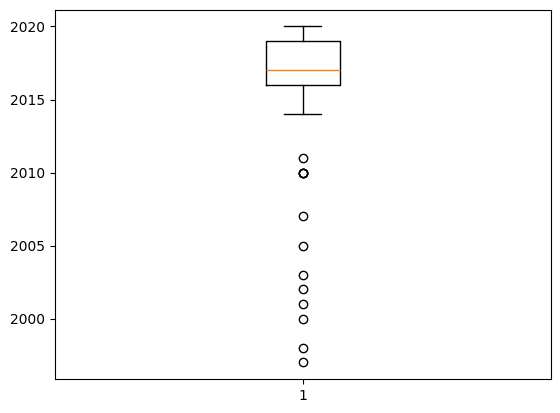

model name: M Class, count:79
2000년 이전 year 수:1


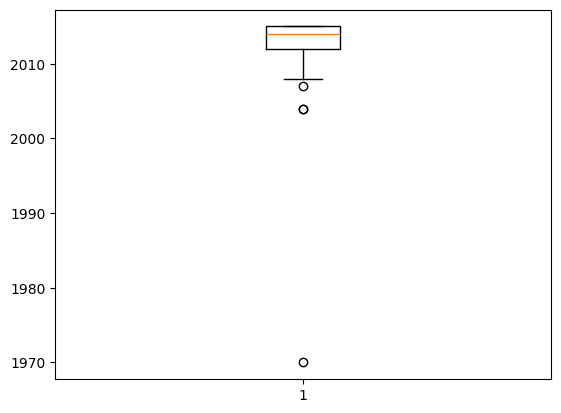

model name: Yaris, count:2122
2000년 이전 year 수:1


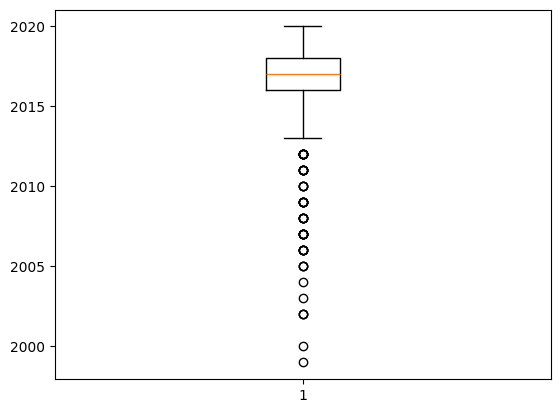

model name: Land Cruiser, count:51
2000년 이전 year 수:1


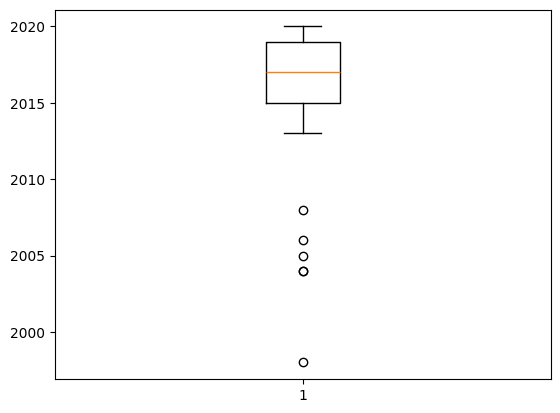

model name: Astra, count:2805
2000년 이전 year 수:1


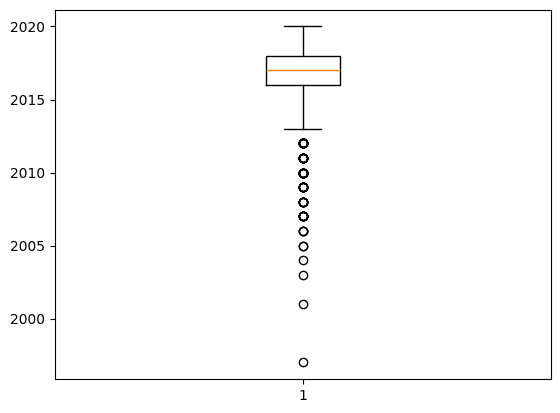

model name: Zafira, count:599
2000년 이전 year 수:1


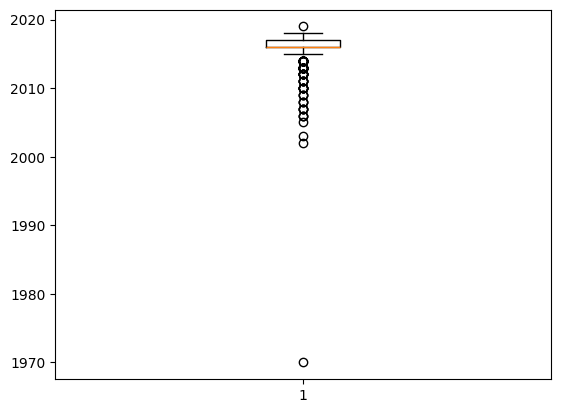

count_nums:15


In [ ]:
# 모델 별 이상치 확인 
unique_model = full_data['model'].unique()
count_nums=0
for i in unique_model:
    model_year = full_data[full_data['model'] == i]['year']
    if any(x < 2000 for x in model_year):
        count_nums += 1
        year_before_2000 = [x for x in model_year if x < 2000]
        print(f'model name:{i}, count:{len(model_year)}')
        print(f'2000년 이전 year 수:{len(year_before_2000)}')
        plt.boxplot(model_year)
        plt.show()
    elif any(x > 2020 for x in model_year):
        count_nums += 1
        year_after_2020 = [x for x in model_year if x > 2020]
        print(f'model name:{i}, count:{len(model_year)}')
        print(f'2000년 이후 year 수:{len(year_before_2000)}')
        plt.boxplot(model_year)
        plt.show()
print(f'count_nums:{count_nums}')

In [ ]:
# year별 개수 세기
full_data_cnt = full_data.groupby(by='year').agg('count')
full_data_cnt

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
year,,,,,,,,,,
1970,2,2,2,2,2,2,2,2,2,0
1996,2,2,2,2,2,2,2,2,2,0
1997,4,4,4,4,4,4,4,4,4,0
1998,8,8,8,8,8,8,8,8,8,0
1999,6,6,6,6,6,6,6,6,6,0
2000,9,9,9,9,9,8,9,9,9,1
2001,20,20,20,20,20,20,20,20,20,0
2002,31,31,31,31,31,30,31,31,31,1
2003,34,34,34,34,34,31,34,34,34,3


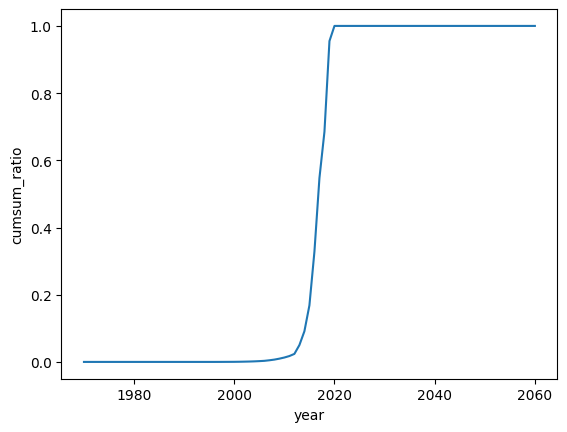

In [ ]:
# year의 누적합과, 누적비율을 세기: 2014년~2020년은 데이터의 95%
full_data_cnt['cumsum'] = full_data_cnt['model'].cumsum()
full_data_cnt['cumsum_ratio'] = full_data_cnt['cumsum'] / 99187
full_data_cnt[['model', 'cumsum', 'cumsum_ratio']]
sns.lineplot(data=full_data_cnt, x='year', y='cumsum_ratio')
plt.show()

In [ ]:
# year 범위 설정: 2014 이상 2020년 이하
# full_data = full_data[(full_data['year'] >= 2014) &(full_data['year'] <= 2020)]

In [ ]:
# IQR 기준으로 year 이상치 탐지
Q1 = full_data["year"].quantile(0.25)
Q3 = full_data["year"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = full_data[(full_data["year"] < lower_bound) | (full_data["year"] > upper_bound)]
print(outliers)

      model  year  price transmission  mileage fuelType    tax   mpg  \
7403     S4  2004   6990    Automatic    88024   Petrol  325.0  22.4   
7404     A3  2009   2490       Manual   152034   Diesel  150.0  55.4   
7414     A3  2009   4495       Manual    92000   Petrol  200.0  40.9   
7415     A5  2010   9495       Manual    76000   Petrol  235.0  38.7   
7416     A3  2009   5995       Manual    82000   Petrol  235.0  39.2   
...     ...   ...    ...          ...      ...      ...    ...   ...   
99181   Eos  2006   2995       Manual    92640   Diesel  200.0  48.0   
99183   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
99184   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
99185   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
99186   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

       engineSize             carMake  tax(£)  
7403          4.2  used_car copy\audi     NaN  
7404          1.9  used_car copy\audi  

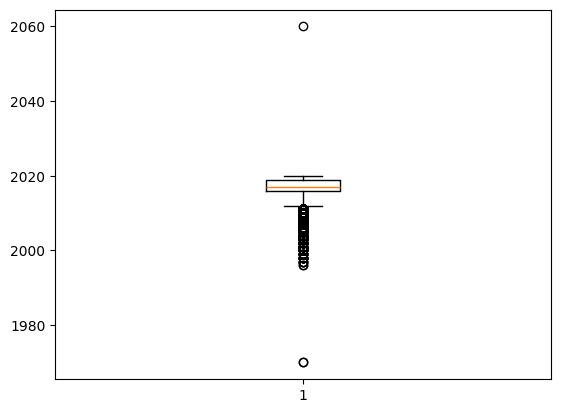

count    99187.000000
mean      2017.087723
std          2.123934
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64

In [ ]:
# year boxplot 그려보기
plt.boxplot(full_data['year'])
plt.show()
full_data['year'].describe()

## ***4. 데이터 인코딩***

In [ ]:
# 명목변수 = ['model', 'transmission', 'fuelType', 'carMake']
# 라벨 인코딩 (추후에 빈도 인코딩으로 변경 가능)
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
incoding_df = full_data.copy()
incoding_df['model'] = LE.fit_transform(incoding_df['model'])

In [ ]:
# 원 핫 인코딩
incoding_df = pd.get_dummies(incoding_df, columns = ['transmission', 'fuelType', 'carMake'])
incoding_df.head()

,model,year,price,mileage,tax,mpg,engineSize,tax(£),transmission_Automatic,transmission_Manual,...,fuelType_Petrol,carMake_used_car copy\audi,carMake_used_car copy\bmw,carMake_used_car copy\ford,carMake_used_car copy\hyundai,carMake_used_car copy\merc,carMake_used_car copy\skoda,carMake_used_car copy\toyota,carMake_used_car copy\vauxhall,carMake_used_car copy\vw
0,9,2017,12500,15735,150.0,55.4,1.4,NaN,False,True,...,True,True,False,False,False,False,False,False,False,False
1,14,2016,16500,36203,20.0,64.2,2.0,NaN,True,False,...,False,True,False,False,False,False,False,False,False,False
2,9,2016,11000,29946,30.0,55.4,1.4,NaN,False,True,...,True,True,False,False,False,False,False,False,False,False
3,12,2017,16800,25952,145.0,67.3,2.0,NaN,True,False,...,False,True,False,False,False,False,False,False,False,False
4,11,2019,17300,1998,145.0,49.6,1.0,NaN,False,True,...,True,True,False,False,False,False,False,False,False,False


## ***5. 데이터 분할***

## ***6. 데이터 스케일링***

## ***7. 모델 학습 및 평가***

## ***7-1. 선형회귀***

## ***7-2. 랜덤 포레스트***

## ***7-3. XGBoost***

## ***7-4. LightGBM***

## ***8. 결과 비교***

## ***9. 결과 해석***

## ***10. 모델 저장 및 로딩***